Importing the liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/zero.csv' , usecols=['User','Tweets','Country','category','likes','date'])

In [ ]:
df.shape

(3612, 6)

In [ ]:
df.sample(5)

,User,Tweets,Country,category,likes,date
266,EmmanuelMacron,alicante moved towards greener independent eur...,France,Society & Culture,3324,2023-03-30 04:02:54+00:00
2416,narendramodi,congratulations people mizoram boost states gr...,India,Society & Culture,16346,2021-12-08 14:44:38+00:00
1132,RTErdogan,power vested constitution signed decision rene...,Turkey,Politics & Government,24236,2023-02-02 14:00:01+00:00
1756,HHShkMohd,today king belgium examined 50year bilateral r...,UAE,Society & Culture,1853,2023-03-03 20:28:49+00:00
404,EmmanuelMacron,elonmusk bird protect children,France,Health,1537,2023-03-18 11:44:25+00:00


In [ ]:
df.dtypes

User        object
Tweets      object
Country     object
category    object
likes        int64
date        object
dtype: object

In [ ]:
df.isnull().sum()

User        0
Tweets      0
Country     0
category    0
likes       0
date        0
dtype: int64

What are the words that Political leaders have used the most in their tweets?

In [ ]:
from wordcloud import WordCloud , STOPWORDS
stop =set(STOPWORDS)
def show_wordcloud(data ,title=None):
  wordcloud = WordCloud(
      background_color = 'white',
      stopwords=stop,
      max_words=200,
      max_font_size=40, 
      scale=3,
      random_state=1,
  ).generate(str(data))
  fig = plt.figure(1,figsize=(15, 15))
  plt.axis('off')
  if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()

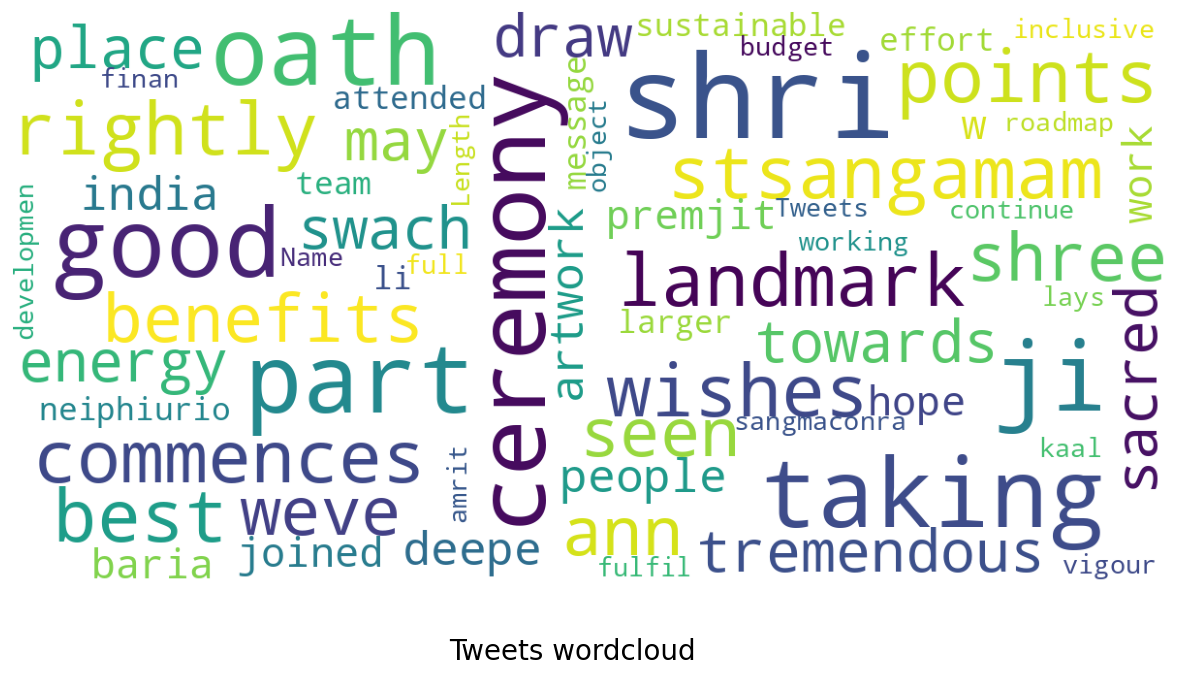

In [170]:
show_wordcloud(df[df['User']=='narendramodi']['Tweets'] , title='Tweets wordcloud')

**Top 10 tweets by number of likes.**

In [ ]:
df.nlargest(10,['likes'])

,User,Tweets,Country,category,likes,date
0,EmmanuelMacron,plastic pollution destroying biodiversity heal...,France,Health,339165,2023-04-17 04:23:42+00:00
1,EmmanuelMacron,plastic pollution destroys biodiversity health...,France,Health,302416,2023-04-17 04:03:46+00:00
2,EmmanuelMacron,betting lady going relive part national destin...,France,Society & Culture,286337,2023-04-17 04:03:15+00:00
3,EmmanuelMacron,5 years revive lady titanium artisans restaura...,France,Society & Culture,272432,2023-04-17 04:02:50+00:00
1897,KingSalman,tonight receive blessed month month end months...,Saudi Arabia,Society & Culture,268213,2023-01-27 12:25:15+00:00
1898,KingSalman,celebration day science affirmation pride nati...,Saudi Arabia,Science & Mathematics,261484,2023-01-27 12:24:15+00:00
4,EmmanuelMacron,thanks bedankt beste mark lang leve de vriends...,France,Society & Culture,248436,2023-04-16 04:15:15+00:00
2631,JoeBiden,im grateful continued leadership kamalaharris,USA,Society & Culture,240210,2014-10-26 12:03:35+00:00
1899,KingSalman,kingdom saudi arabia remember great pride anni...,Saudi Arabia,Society & Culture,239245,2023-01-27 12:04:17+00:00
1900,KingSalman,memory national day reflects pride glory natio...,Saudi Arabia,Society & Culture,239056,2023-01-27 09:11:30+00:00


Political leaders with total number of likes in descending order.

In [ ]:
df.groupby("User").sum().sort_values(by=['likes'],ascending=False)

,likes
User,
RTErdogan,13206956
JoeBiden,9438395
KingSalman,8594425
narendramodi,8451274
EmmanuelMacron,7035721
lopezobrador_,4489043
Pontifex,4337880
HHShkMohd,2098368


In [139]:
bar_chart = df.groupby("User").sum()
def bar_plot(data ,x_horiz,y_verti , palete=None):
  data = pd.DataFrame(data)
  fig = plt.figure(figsize=(10,8))
  chart=sns.barplot(
      x=x_horiz,
      y=y_verti,
      data=data,
  )
  if palete:
    chart=sns.barplot(
      x=x_horiz,
      y=y_verti,
      data=data,
      palette=palete
  )

  chart=chart.set_xticklabels(
      chart.get_xticklabels(), 
      rotation=65, 
      horizontalalignment='right',
      fontweight='light',
  )
  plt.show()

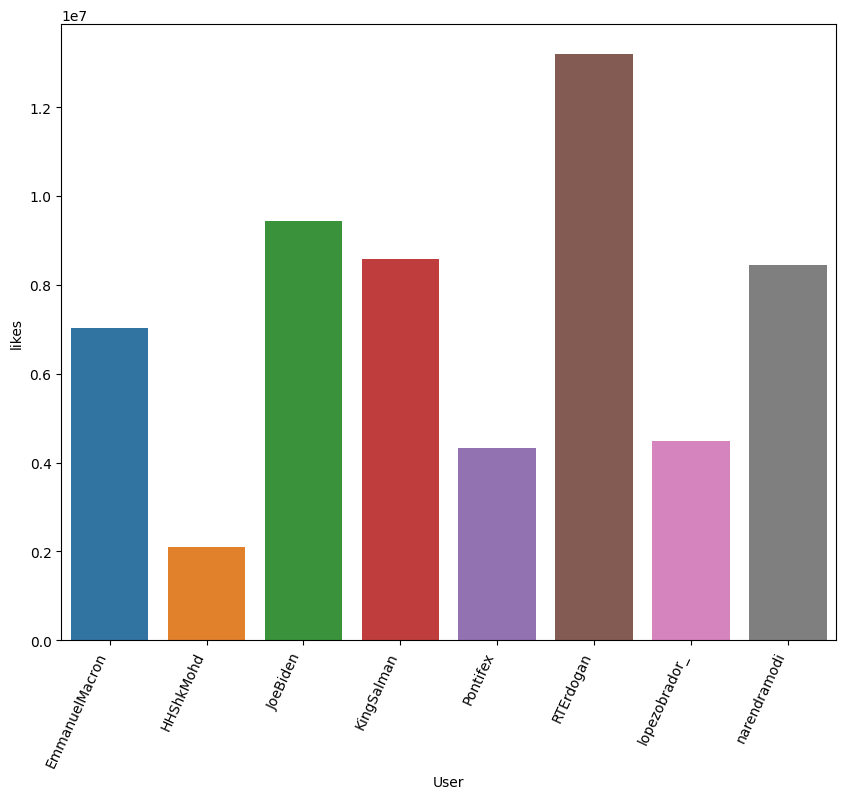

In [140]:
bar_plot(data=bar_chart,x_horiz=bar_chart.index,y_verti=bar_chart['likes'])

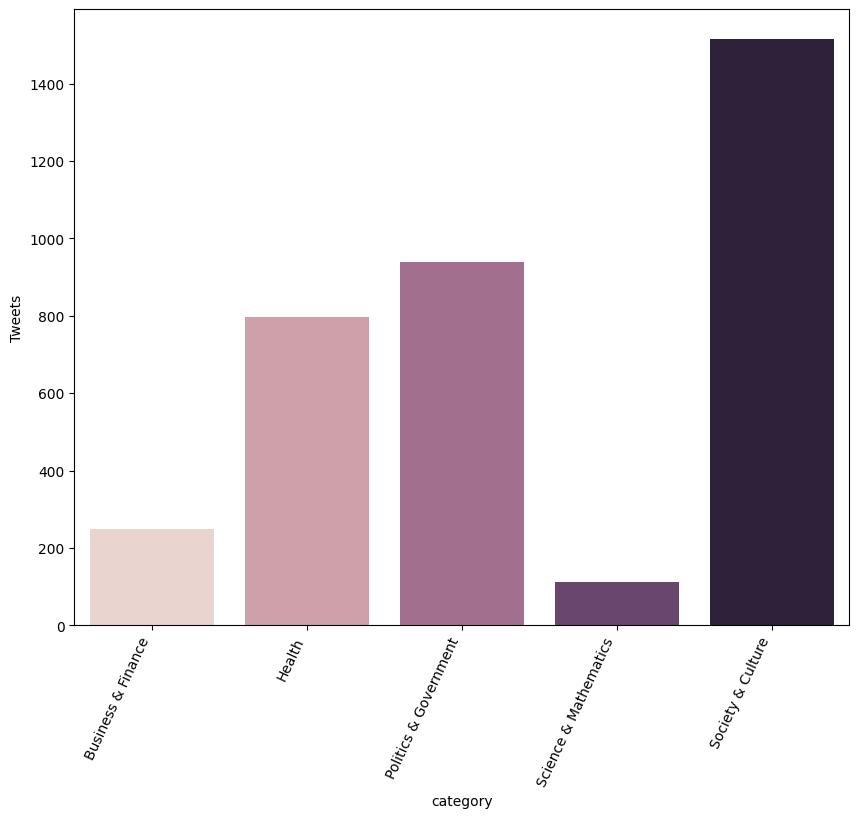

In [ ]:
category_plot = df.groupby('category').count()
bar_plot(data=category_plot,x_horiz=category_plot.index,y_verti=category_plot['Tweets'],palete=sns.cubehelix_palette(len(category_plot['Tweets'])))

In [157]:
def category_user(user):
  user_df = df[df['User']==user].groupby('category').count()['Tweets']
  return user_df

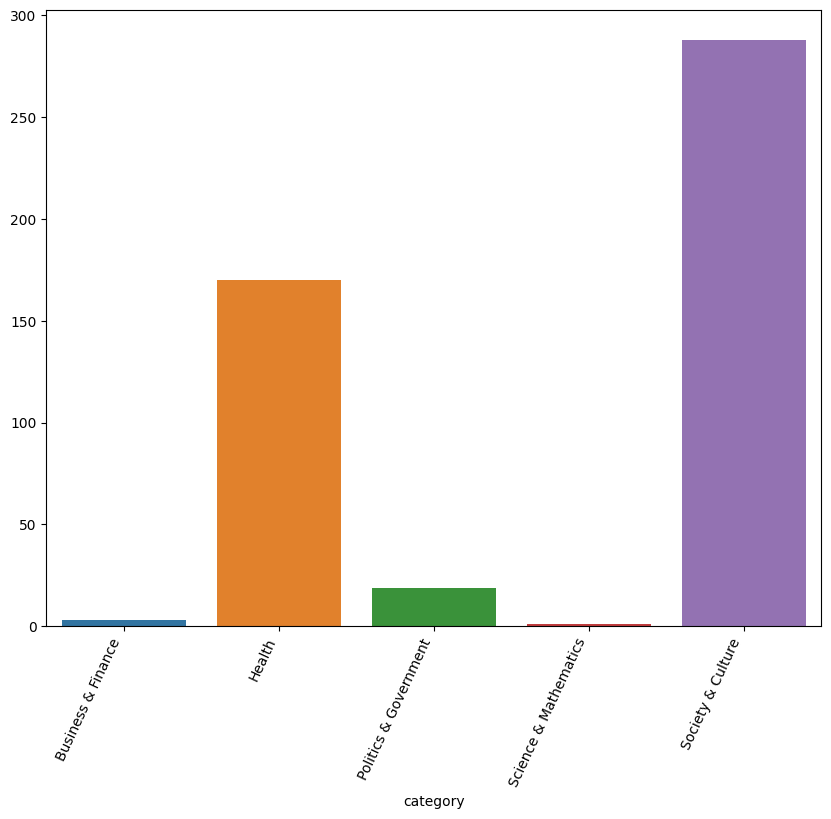

In [158]:
bar_plot(data=category_user('Pontifex') ,x_horiz=category_user('Pontifex').index , y_verti=category_user('Pontifex').values)

In [148]:
category_plot['Tweets'].index

Index(['Business & Finance', 'Health', 'Politics & Government',
       'Science & Mathematics', 'Society & Culture'],
      dtype='object', name='category')

In [154]:
def pie_chart(data):
  plt.pie(x=data.values,labels=data.index ,colors=sns.color_palette('bright') ,autopct='%.0f%%')
  plt.show()

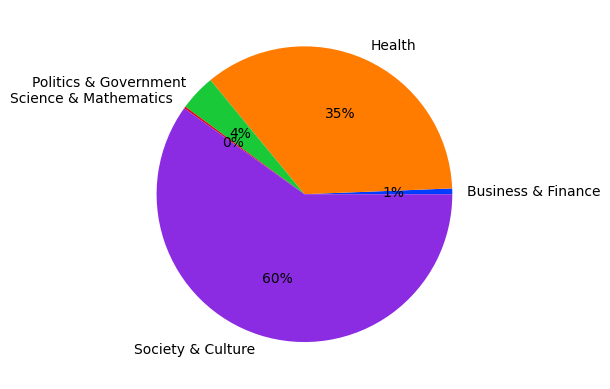

In [159]:
pie_chart(category_user('Pontifex'))

In [163]:
category_likes=df.groupby('category').sum()['likes']

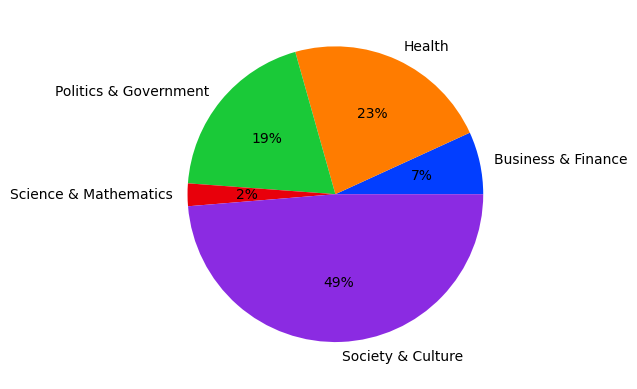

In [164]:
pie_chart(category_likes)

In [179]:
stop.update(['wh','de','dtype','ji','ann','leve','prince','salman','oh','let'])

In [180]:
most_words = [word for tweet in df['Tweets'] for word in tweet.split() if word not in stop]

In [181]:
from collections import Counter
Counter(most_words).most_common(20)

[('us', 616),
 ('people', 479),
 ('today', 445),
 ('world', 343),
 ('new', 278),
 ('god', 259),
 ('country', 257),
 ('arab', 234),
 ('years', 232),
 ('peace', 219),
 ('united', 217),
 ('emirates', 213),
 ('national', 208),
 ('year', 198),
 ('good', 194),
 ('one', 187),
 ('day', 184),
 ('president', 178),
 ('make', 166),
 ('first', 163)]

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   User      3612 non-null   object             
 1   Tweets    3612 non-null   object             
 2   Country   3612 non-null   object             
 3   category  3612 non-null   object             
 4   likes     3612 non-null   int64              
 5   date      3612 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 169.4+ KB


In [185]:
df['date'] = pd.to_datetime(df['date'] , format='%Y/%m/%d')